**Project Three | Data Mining**

Name : Joseph Sako

In [39]:
# Start imports ...
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    classification_report,
    precision_recall_curve,
    f1_score,
    precision_score
)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
# End imports .

In [40]:
# Data .
d = pd.read_csv('dataset-kidney-stone.csv')
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  90 non-null     int64  
 1   gravity     90 non-null     float64
 2   ph          90 non-null     float64
 3   osmo        90 non-null     int64  
 4   cond        90 non-null     float64
 5   urea        90 non-null     int64  
 6   calc        90 non-null     float64
 7   target      90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


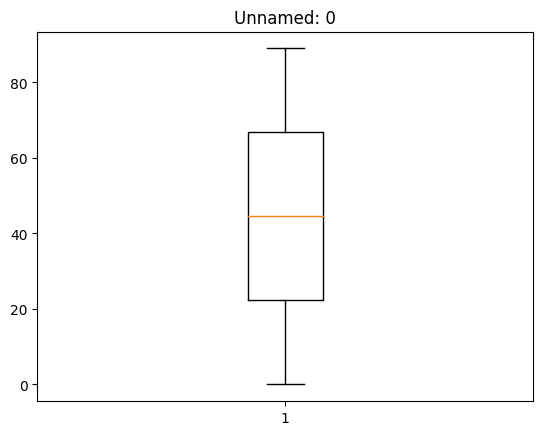

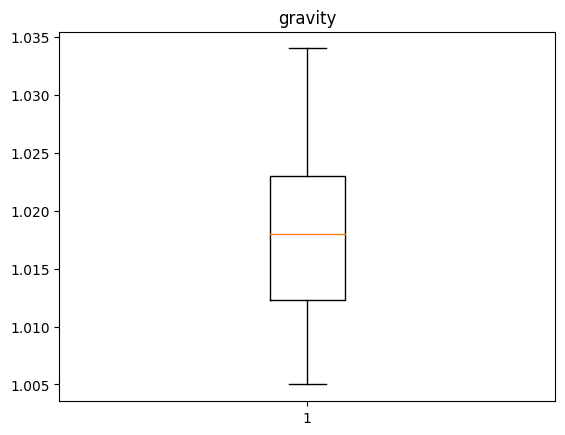

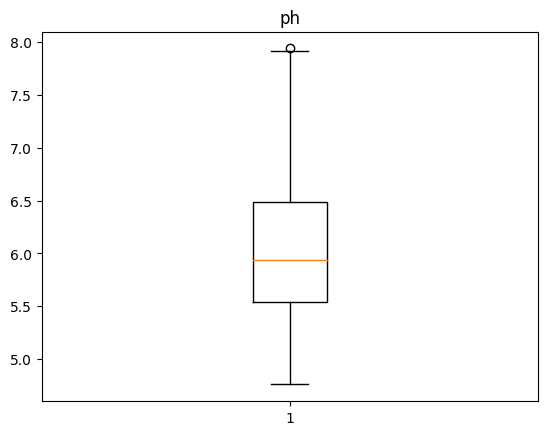

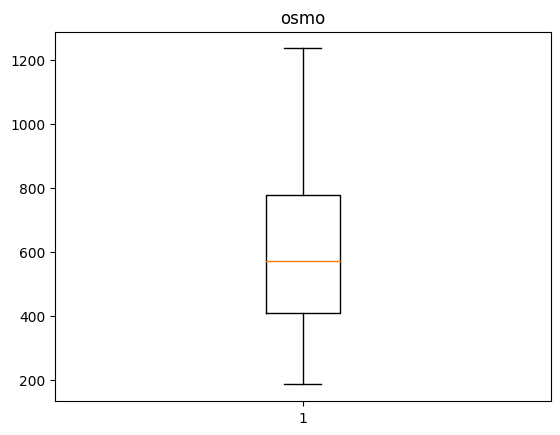

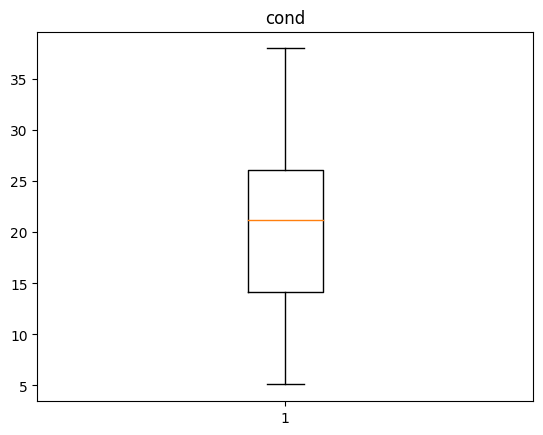

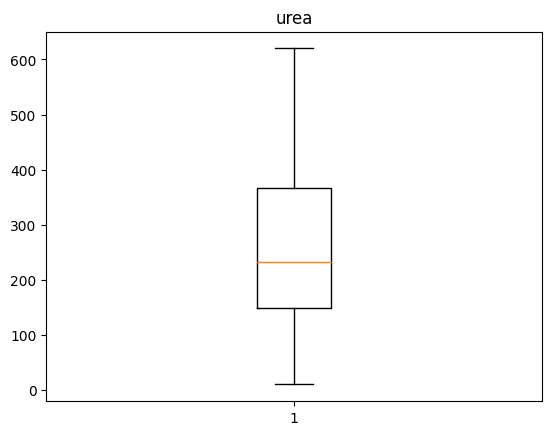

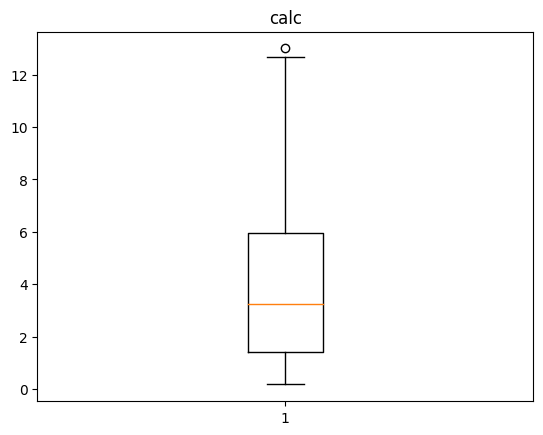

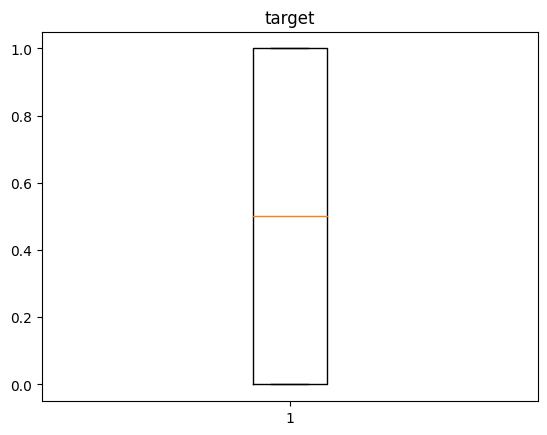

In [41]:
# Examine the distribution of each feature to see if it is skewed or has any outliers .
for i in d.columns:
  plt.boxplot(d[i])
  plt.title(i)
  plt.show()

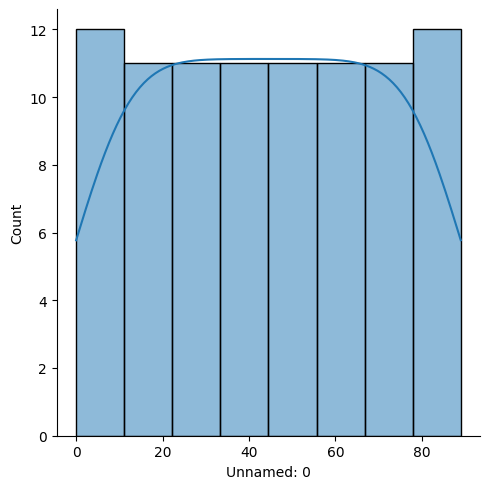

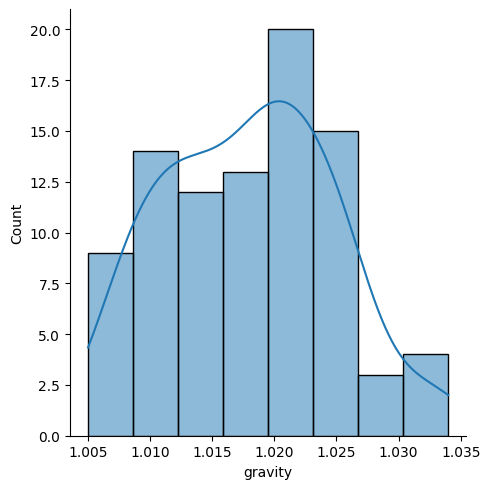

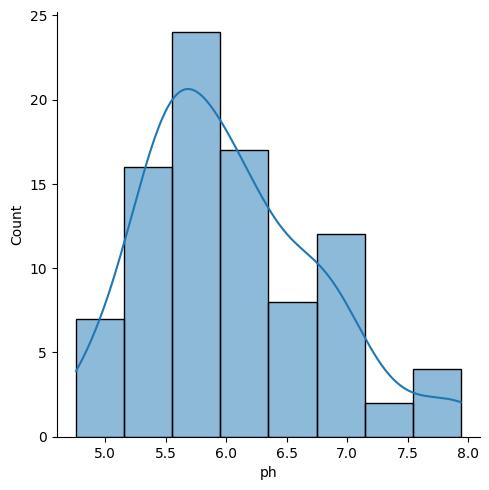

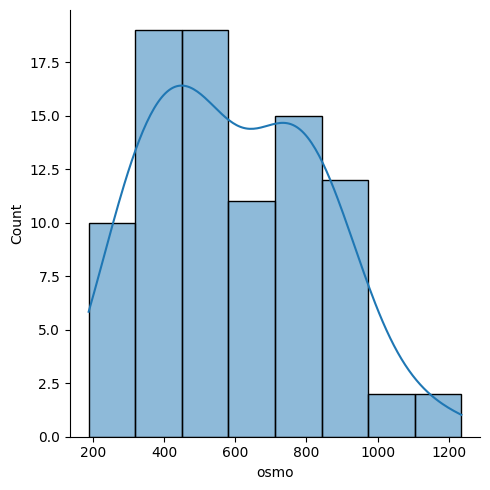

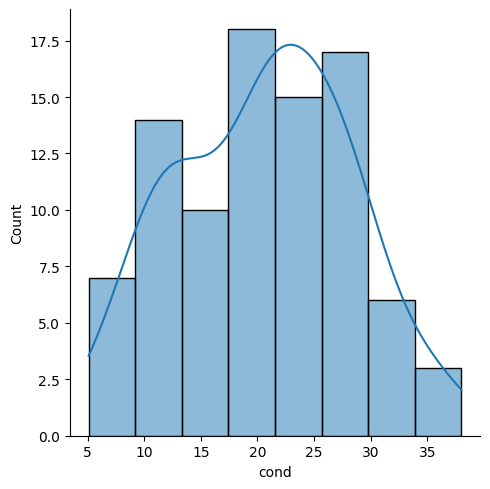

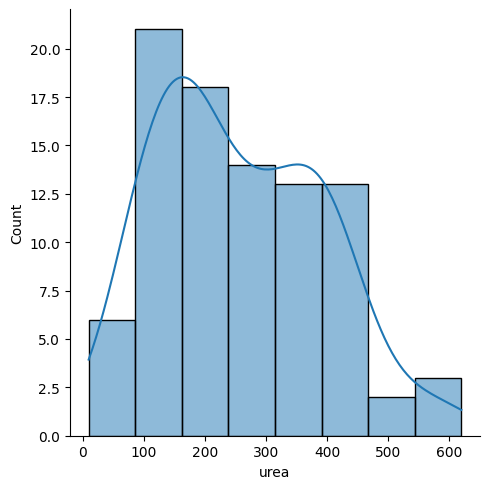

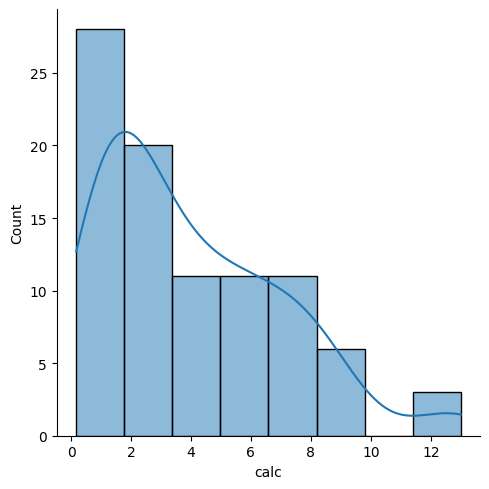

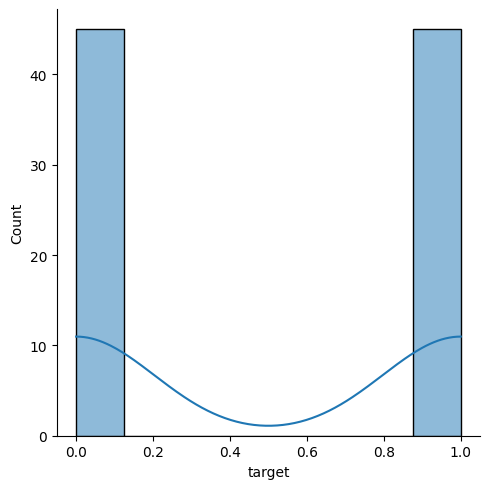

In [42]:
# Data distribution and skewness .
for i in d.columns:
  sns.displot(d, x = i, kde = True)

It is made evident that only two features have few distinctive outliers . This being the case , outlier removal will not be performed as it is deemed unnecessary .

In [43]:
# Standardize the data to make sure all the variables are in the same format .
x = d.drop(['target', 'Unnamed: 0'], axis = 1)
y = d['target']

In [44]:
ss = StandardScaler()
x[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']] = ss.fit_transform(d[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']])

In [45]:
x[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']] = x[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']].apply(lambda y: y/y.max(), axis = 0)

In [46]:
x

,gravity,ph,osmo,cond,urea,calc
0,0.189939,-0.591931,0.193582,-0.381032,0.510779,-0.174544
1,-0.059311,-0.155857,-0.039979,-0.035774,0.104478,0.052572
2,-0.620123,0.611212,-0.443977,-0.329243,-0.434494,-0.184563
3,-0.433185,-0.276697,-0.306681,-0.461592,-0.094527,-0.207943
4,-0.807060,0.253947,-0.655445,-0.755061,-0.462134,-0.318161
...,...,...,...,...,...,...
85,0.218083,-0.252486,0.242504,0.208294,0.300719,0.406507
86,-0.090413,0.453730,-0.084166,-0.004137,-0.149807,0.195661
87,0.922367,-0.311640,0.761704,0.147711,0.878386,0.517287
88,0.368796,-0.488727,-0.437664,-0.488943,-0.575456,-0.360286


In [47]:
# Split the dataset into training and testing sets using a reasonable ratio (80:20) .
# This will allow us to train our model on a portion of the data and evaluate its performance on unseen data .
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [48]:
# Using extreme gradient boosting (XGBoost) to predict the risk of kidney stones based on the input features .
# Using a Python library such as xgboost to build and train the model .
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [49]:
y_pred = xgb_clf.predict(x_test)
xgboosts1, xgboosts2, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('ROC-AUC Score : ', roc_auc)
# Specified metrics .
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
print('R^2 Score : ', r2_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.71      0.71      0.71         7

    accuracy                           0.78        18
   macro avg       0.77      0.77      0.77        18
weighted avg       0.78      0.78      0.78        18

ROC-AUC Score :  0.7662337662337663
Mean Absolute Error :  0.2222222222222222
Mean Squared Error :  0.2222222222222222
R^2 Score :  0.06493506493506507


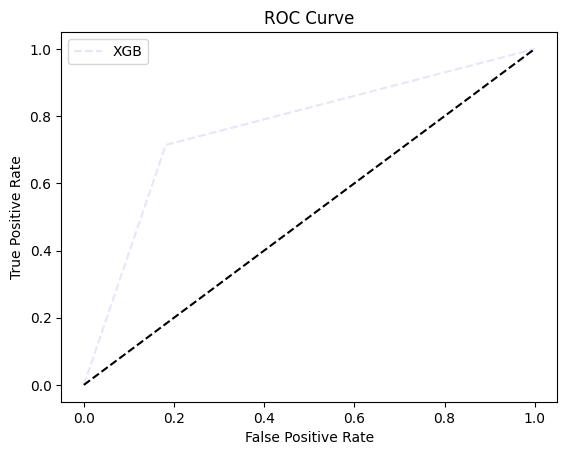

In [50]:
plt.plot(xgboosts1, xgboosts2, linestyle = '--', color = '#E6E6FA', label = 'XGB')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [51]:
# Set up a random search CV object and define the hyperparameter grid to search over , etc. .
rg = xgb.XGBClassifier()
pg = {
    'learning_rate': uniform(0, 1),
    'max_depth': randint(1, 10),
    'n_estimators': randint(100, 1000)
}

In [52]:
rs = RandomizedSearchCV(
    rg,
    pg,
    n_iter = 10,
    cv = 5,
    random_state = 42,
    n_jobs = -1
)
rs.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f4b9507d370>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f4b94dd4670>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f4b962b0550>},
                   random_state=42)

In [53]:
bp = rs.best_params_

In [54]:
bpm = xgb.XGBClassifier(**bp, random_state = 42)
bpm.fit(x, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3042422429595377,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=352, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [55]:
yp_train = bpm.predict(x_train)
yp_test = bpm.predict(x_test)
xgboosts1_test, xgboosts2_test, _ = roc_curve(y_test, yp_test)
roc_auc = roc_auc_score(y_test, yp_test)
# Test .
print(classification_report(y_test, yp_test))
print('Testing ROC-AUC Score : ', roc_auc)
# Specified metrics .
print('Testing Mean Absolute Error : ', mean_absolute_error(y_test, yp_test))
print('Testing Mean Squared Error : ', mean_squared_error(y_test, yp_test))
print('Testing R^2 Score : ', r2_score(y_test, yp_test))

xgb_bps, xgb_bpt, _ = roc_curve(y_train, yp_train)
roc_auc = roc_auc_score(y_train, yp_train)
# Train .
print(classification_report(y_train, yp_train))
print('Training ROC-AUC Score : ', roc_auc)
# Specified metrics .
print('Training Mean Absolute Error : ', mean_absolute_error(y_train, yp_train))
print('Training Mean Squared Error : ', mean_squared_error(y_train, yp_train))
print('Training R^2 Score : ', r2_score(y_train, yp_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Testing ROC-AUC Score :  1.0
Testing Mean Absolute Error :  0.0
Testing Mean Squared Error :  0.0
Testing R^2 Score :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        38

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

Training ROC-AUC Score :  1.0
Training Mean Absolute Error :  0.0
Training Mean Squared Error :  0.0
Training R^2 Score :  1.0


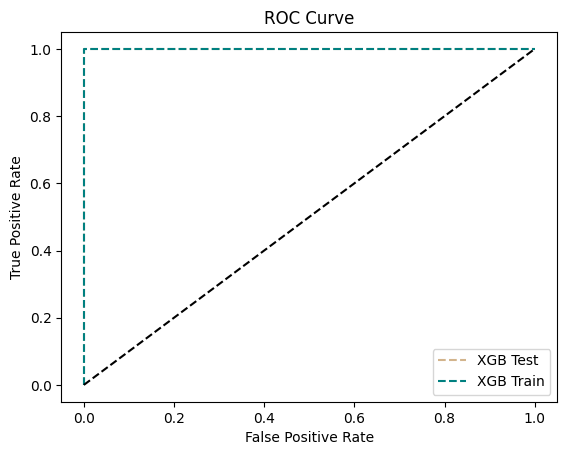

In [56]:
plt.plot(xgboosts1_test, xgboosts2_test, linestyle = '--', color = '#D2B48C', label = 'XGB Test')
plt.plot(xgb_bps, xgb_bpt, linestyle = '--', color = '#008080', label = 'XGB Train')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

6. According to the results, XGBoost is very useful for estimating the likelihood that kidney stones may form. In this study, RandomizedSearchCV was used to optimize the hyperparameters of the XGBoost classifier. Then I fitted the classifier using the optimized parameters. The XGBoost model demonstrated exceptional performance with best parameters, indicating its potential as a trustworthy tool for estimating the risk of kidney stones. Additionally, the usefulness of the method is demonstrated by the fact that the optimal hyperparameters found can be used for future predictions. These findings lead to the conclusion that XGBoost is very useful for estimating the likelihood of kidney stone formation. Healthcare professionals can utilize XGBoost as a potent and precise technique to forecast the risk of kidney stones by using the ideal hyperparameters discovered.